# Support Vector Machine - SVM
* Notebook by Adam Lang
* Date: 4/28/2024
* We will implement a Support Vector Machine (SVM) classification algorithm using a social network dataset.
* This is a binary classification task where we will predict based on the Age and Salary of an individual if they will purchase an SUV

## Import libraries in python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Dataset upload

In [2]:
## dataset path in colab
data_path = '/content/drive/MyDrive/Springboard_Data_Science/Supervised Learning/SVM and Kernels/Social_Network_Ads.csv'

In [3]:
## upload dataset
df = pd.read_csv(data_path)

In [4]:
## df head
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Note:
* For the Purchased column, the values are:
    * 0 - no purchase SUV

    * 1- purchase SUV

## EDA

In [5]:
## info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
## describe
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


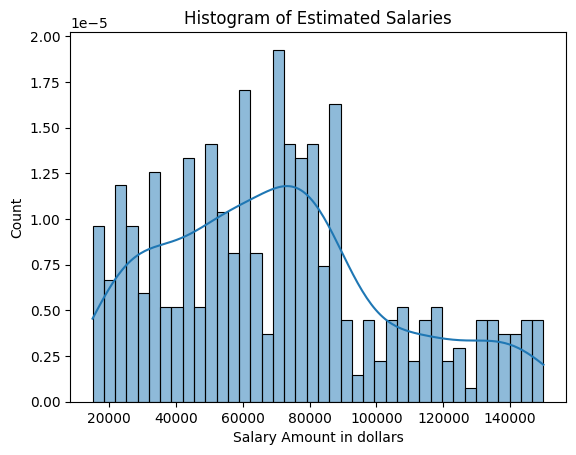

In [40]:
## lets plot a histogram
sns.histplot(df['EstimatedSalary'],bins=40,kde=True,stat='density')
plt.title("Histogram of Estimated Salaries")
plt.xlabel("Salary Amount in dollars")
plt.ylabel("Count")
plt.show();

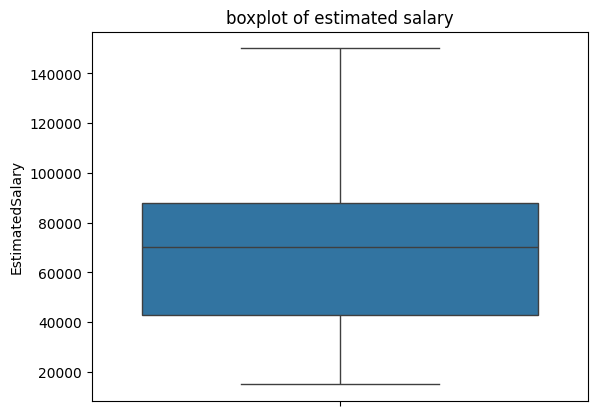

In [8]:
## boxplot of salaries
sns.boxplot(df['EstimatedSalary']).set(title="boxplot of estimated salary")
plt.show()

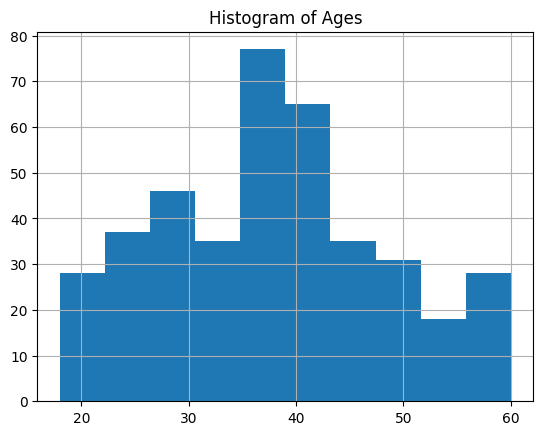

In [25]:
##histogram of age
df['Age'].hist(bins=10)
plt.title("Histogram of Ages")
plt.show();

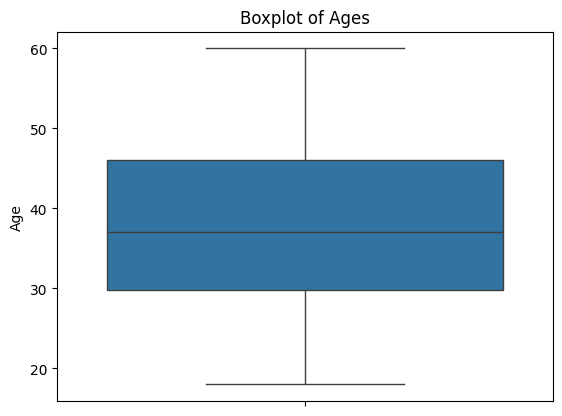

In [29]:
## age boxplot
sns.boxplot(y='Age',data=df).set(title="Boxplot of Ages")
plt.show();

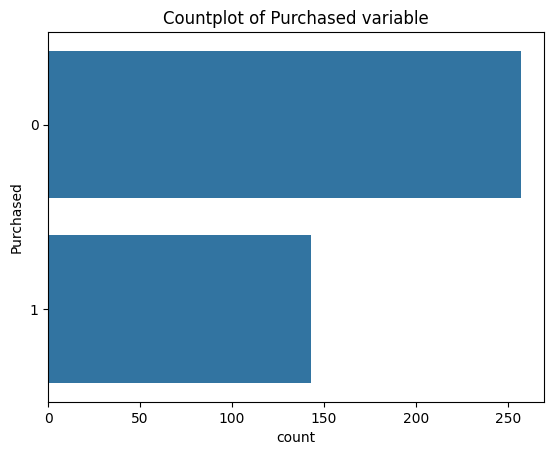

In [32]:
##count plot of purchased variable
sns.countplot(y='Purchased',data=df).set(title="Countplot of Purchased variable")
plt.show()

Summary:
* We can see there are more 0's than 1's meaning there is imbalance in the target variable. Recall that 0 means no purchase of an SUV and 1 means purchase of an SUV.

## Scatterplot of raw dataset prior to pre-processing

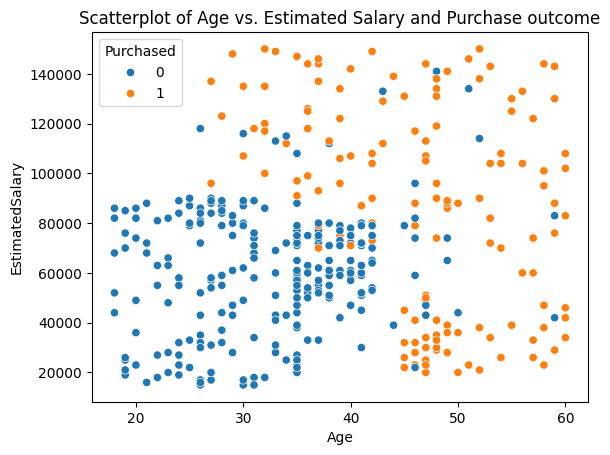

In [36]:
## scatterplot
sns.scatterplot(x='Age',y='EstimatedSalary',data=df,hue='Purchased').set(title="Scatterplot of Age vs. Estimated Salary and Purchase outcome")
plt.show();

Summary:
* Before we perform pre-processing we can see how the raw data presents in a scatterplot.
* We can infer from the plot that most people that will not purchase an SUV (0 or blue) are less than age 40, and make about 80,000 dollars or less. We can also infer that those that will purchase an SUV are usually age 45 and above.
* However, this is where the SVM model will help with modeling this data, is that we can see a "natural" diagnonal hyperplane appear to be present in the data suggesting that we could fit the orange or 1 purchased and blue or not purchased into 2 perfect classes. But, we can see there are some definite outliers and the SVM can help us account for these with the support vectors and the maximal margin hyperplane.
* We should also keep in mind the histplot or kde plot above which showed us that there is a long right tail to the data with most of the people in this dataset having a salary of 80000 or less.

## Pre-processing

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [10]:
# lets look at X
X[0:10]

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000]])

In [11]:
#lets look at y
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## Split dataset into Train and Test sets

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)


In [13]:
## let's look at X_train set
X_train

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],
       [    26,  15000],
       [    60, 102000],
       [    38, 112000],
       [    40, 107000],
       [    42,  53000],
       [    35,  59000],
       [    48,  41000],
       [    48, 134000],
       [    38, 113000],
       [    29, 148000],
       [    26,  15000],
       [    60,  42000],
       [    24,  19000],
       [    42, 149000],
       [    46,  96000],
       [    28,  59000],
       [    39,  96000],
       [    28,  89000],
       [    41,  72000],
       [    45,  26000],


## Feature Engineering
* Apply StandardScaler from scikit-learn


In [14]:
from sklearn.preprocessing import StandardScaler

# set up standard scaler
sc = StandardScaler()

## apply scaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# view scaled X_train set
X_train[:10]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153]])

In [16]:
## view scaled X_test set
X_test[:10]

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441]])

## Train a Support Vector Machine Model - SVM on Training data

In [17]:
from sklearn.svm import SVC

# setup classifier
classifier = SVC(kernel = 'linear', random_state=0)

# fit classifier to data
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predict new result
* Let's predict a new result for a customer with:
    * Age: 30
    * Estimated Salary: 87000

In [18]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


summary: For this customer and salary, the SVM predicts not to purchase the SUV.

## Predict on test set results

In [19]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


## Confusion Matrix Evaluation

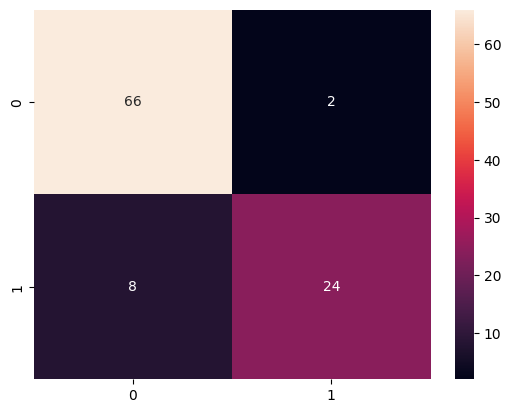

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

##setup confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

Summary of Confusion Matrix:
* There are 66 True positives.
* There are 2 False positives.
* There are 8 False negatives.
* There are 24 True negatives.

## Accuracy Evaluation

In [21]:
accuracy_score(y_test, y_pred)

0.9

## Precision Evaluation

In [22]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.9230769230769231

# Visualize the SVM
* Training set results

<ipython-input-23-a24006eb9d76>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


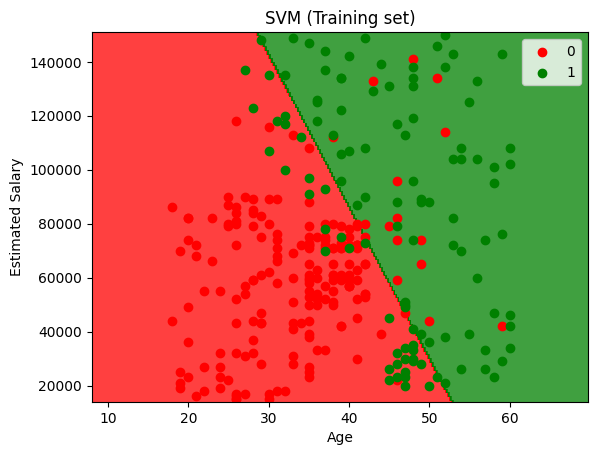

In [23]:
from matplotlib.colors import ListedColormap


X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show();

Summary:
* We can see the linear classifier is not a perfect hyperplane for this binary classification task. It is clear that our data is non-linear and does not follow a normal distribution as we had seen above in the exploratory data analysis.
* Therefore if we try another SVM algorithm such as an SVM kernel we may see better results with our hyperplane to capture those points that were not accounted for with the linear hyperplane.

* Test Set Results

<ipython-input-24-31f97ff25dde>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


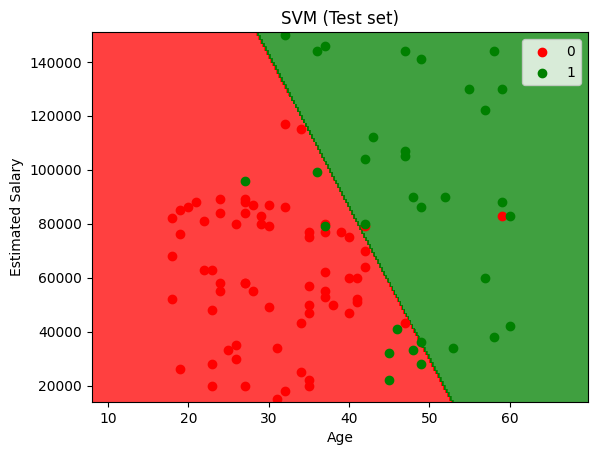

In [24]:

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Summary:
* We can see similar results above for the test set performance of the SVM classifier. It is clear that we need to try a non-linear classifier with this dataset as the hyperplane is not able to capture all support vectors.

# Reminder about the SVM Intution
* The goal is to separate the data by a decision boundary or hyperplane.
* This can depend on whether this is a binary or multi-class classification problem.


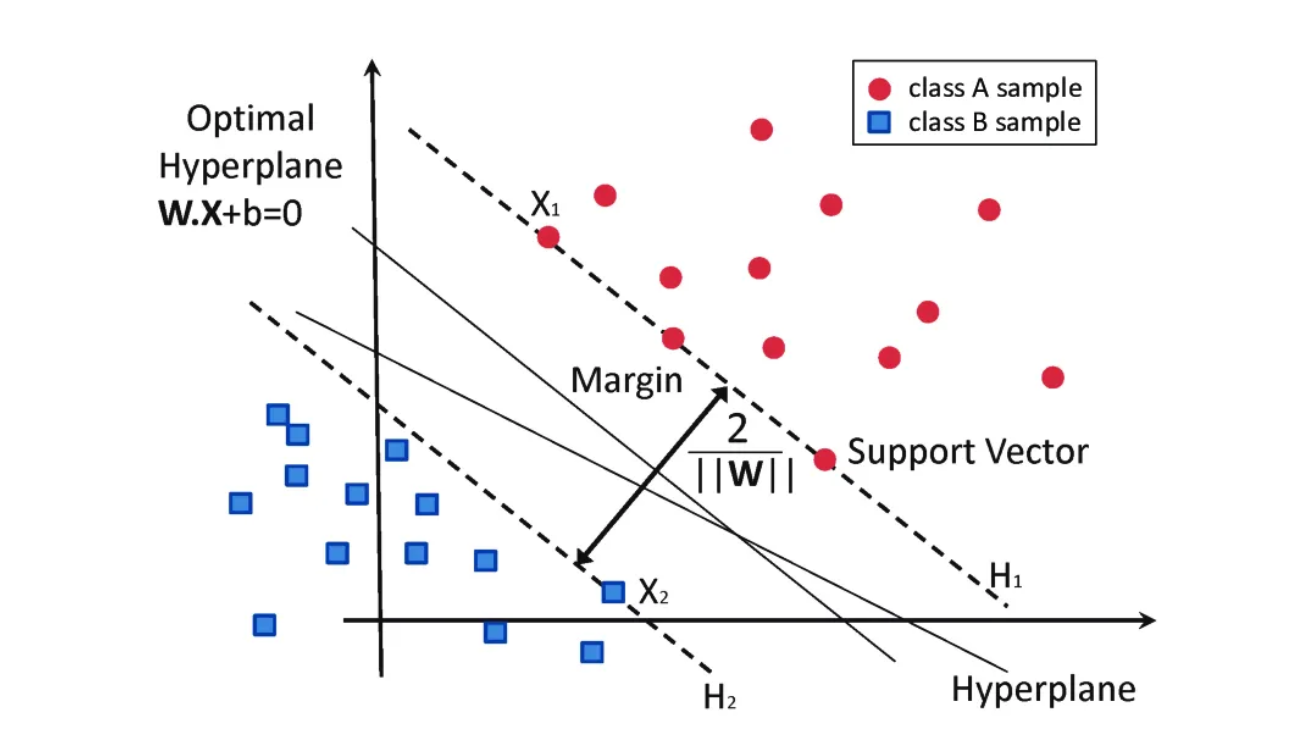

The **maximal margin hyperplane** or optimal separating hyperplane which is the separating hyperplane that is farthest from the observations.
  * We calculate the perpendicular distance from each training observation given a hyperplane. This is the **margin**.

Margin is defined as the gap between two lines on the closet data points of different classes. It can be calculated as the perpendicular distance from the line to the support vectors.
  * Large margin is considered a good margin
  * Small margin is considered a bad margin.

Support Vectors are datapoints that are closest to the hyperplane. Separating line will be defined with the help of these data points.

In summary, what makes the SVM unique is the support vectors. The algorithm focuses on the data points that are most difficult to classify and those are the vectors that are closest to the maximal margin hyperplane.